# Lecture 7: Advanced Customization with Seaborn Objects API

### 🎯 Objectives
- Learn the grammar of the Seaborn Objects API (v0.12+)
- Combine geoms and facets using `.add()` and `.facet()`
- Customize styles, themes, and color palettes
- Export figures for publications in high quality

## 🔧 The Seaborn Objects Grammar
The new `seaborn.objects` API is inspired by ggplot2 in R.

You use `so.Plot()` as a base, and then add:
- `.add(so.Mark(...))` for layers (points, lines, etc.)
- `.facet()` to split into subplots
- `.scale()` for axis, color, or size scaling

Let's try it out!

In [1]:
import pandas as pd
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt

# Load example data
tips = sns.load_dataset("tips")

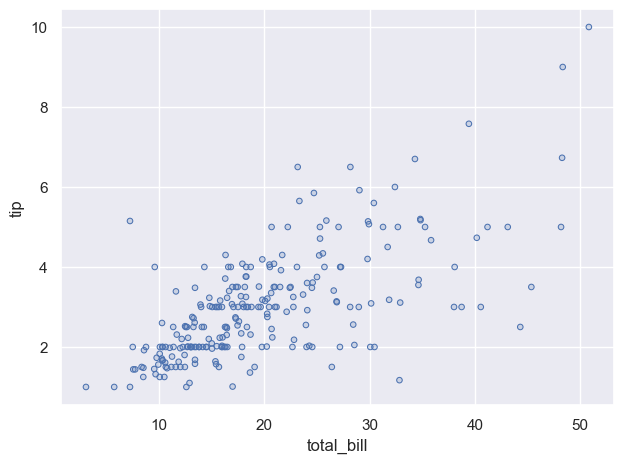

In [2]:
# Basic scatterplot
p = so.Plot(tips, x="total_bill", y="tip")
p.add(so.Dots()).show()

## 📊 Layering Geoms

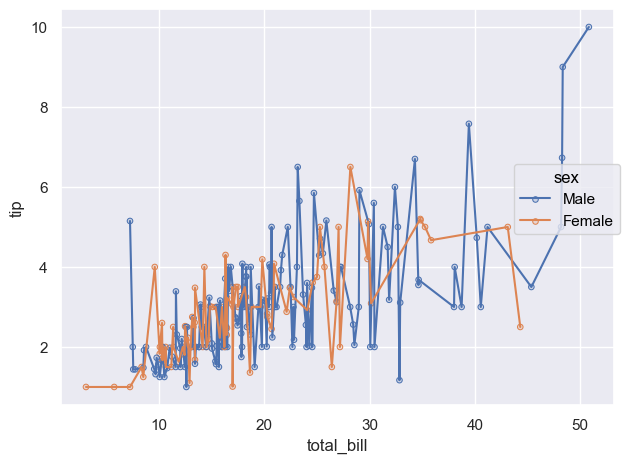

In [3]:
# Scatter + line
(
    so.Plot(tips, x="total_bill", y="tip", color = 'sex')
    .add(so.Dots())
    .add(so.Line())
    .show()
)

## 🧩 Faceting

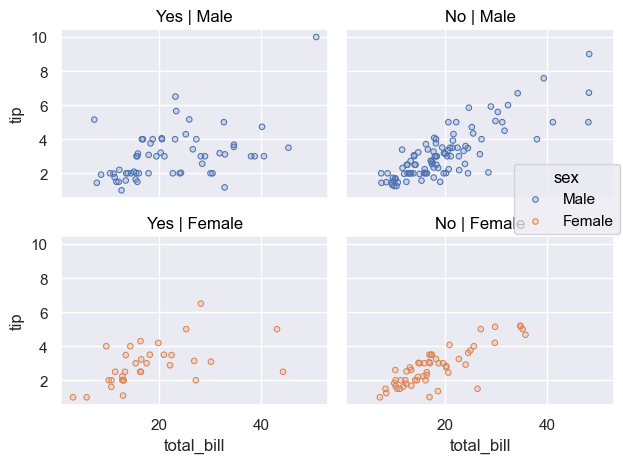

In [4]:
# Facet by smoker and sex
p = (
     so.Plot(tips, x="total_bill", y="tip", color="sex")
     .add(so.Dots())
     .facet(col="smoker", row="sex")
)
p.show()

# Saving to file

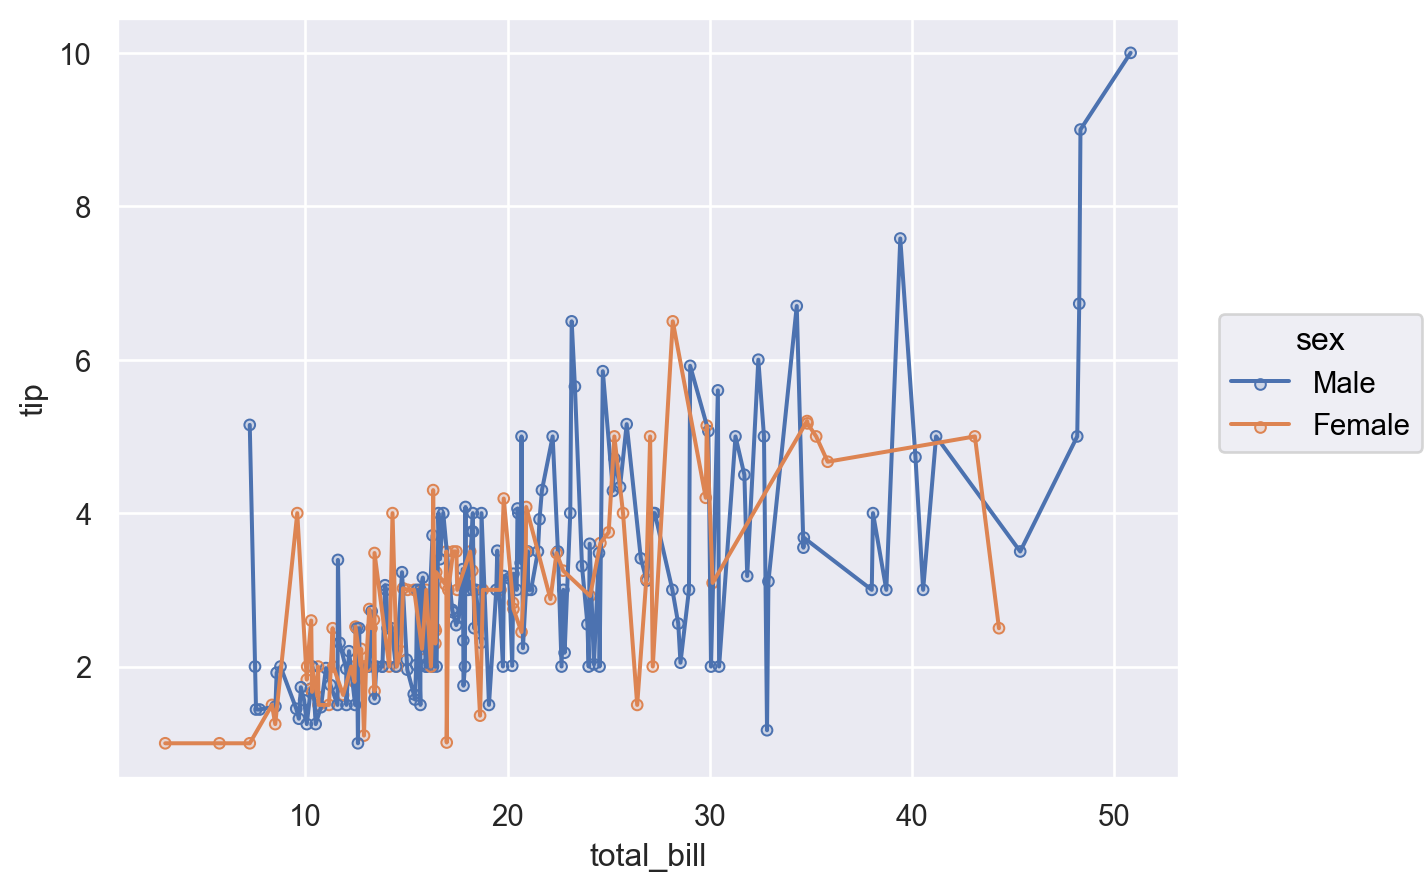

In [9]:
# Save to high-res PNG or vector PDF
plot = (
    so.Plot(tips, x="total_bill", y="tip", color="sex")
    .add(so.Dots())
    .add(so.Line())
)
plot.save("tips_regression.pdf", dpi=300)  # vector export

In [10]:
import seaborn as sns

In [15]:
# Load your OHIE dataset
df = pd.read_csv("../Data/OHIE_12m.csv")

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=["PHQ2_sum", "hhinc_pctfpl_12m", "female_list", "treatment"])

# Create a faceted regression plot
plot = (
    so.Plot(df_clean, x="hhinc_pctfpl_12m", y="PHQ2_sum")
    .facet(col="treatment", wrap=2)  # facets by treatment group
    .add(so.Dots(alpha=0.4, jitter = .3))
    .scale(color="Set2")
)

# Show the figure
fig = plot.show()

# # Optionally export
# fig.savefig("ohie_income_vs_depression.pdf", dpi=300, bbox_inches="tight")

TypeError: Dots.__init__() got an unexpected keyword argument 'jitter'